# Craft a Story from a Dataset: Investigating Kaggle's Fast Food Restaurants Across America Dataset

## Overview

In this jupyter notebook, addressed to a general, non-technical, educated audience, I’d like to investigate fast food restaurants in America, with a special focus on McDonalds. McDonalds is known to be the largest (in terms of revenue) and most prevalent fast food restaurant in America (and worldwide). It is the paradigmatic fast food restaurant, and is what everyone thinks of when they think of fast food. For these reasons I thought it would be interesting to pay special attention to McDonalds. 

One goal of this project is to use visualizations and data to bring viewers a new perspective on fast food restaurants that they haven’t seen before. 

Before starting this project, I was mainly interested in investigating data regarding the location (province, latitude, longitude) of restaurants. However, I also ended up investigating things regarding the relative amount of different types of restaurants, and also things specifically relating to McDonalds.

One of my early questions in the notebook, starting out, was how far north do restaurants go? Are there any above the latitude of 50? For perspective, to an approximate degree, Mexico City, Mexico is at latitude 20, Austin, Texas is at latitude 30, New York City is at latitude 40, Vancouver, Canada is at latitude 50, and St Petersburg, Russia is at latitude 60. In my jupyter notebook, I wondered, after seeing some restaurants above latitude 50, how many are above latitude 60? 

I graphed the mean, max, and min latitude (three separate graphs) of the top 10 most numerous restaurants. I was also curious ahead of this project about the distribution of different restaurants across different states, so I looked into that. I also became curious about the distribution of McDonalds across different states, so I looked into that.


In [190]:
# In the line below I import a necessary library:

In [2]:
import pandas as pd

Dataset link: https://www.kaggle.com/datafiniti/fast-food-restaurants

In [192]:
# In the line below I use pandas' read_csv() function to load the csv file of the dataset into a pandas DataFrame:

In [3]:
df = pd.read_csv('FastFoodRestaurants.csv')

In [193]:
# In the line below I use the function head() to get a look at the top 5 rows of the dataset:

In [4]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [194]:
# The line below gives the frequency of different names in the name column:

In [5]:
df['name'].value_counts()

McDonald's                    1886
Burger King                   1154
Taco Bell                      873
Wendy's                        731
Arby's                         518
                              ... 
Taco Delight                     1
Subway - Roland Park             1
Kings Contrivance Jewelers       1
Elevation Burger                 1
City Bites                       1
Name: name, Length: 548, dtype: int64

In [195]:
# The line below gives summary statistics for the name column:

In [6]:
df['name'].describe()

count          10000
unique           548
top       McDonald's
freq            1886
Name: name, dtype: object

In [196]:
# The line below gives overview information about the dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     10000 non-null  object 
 1   city        10000 non-null  object 
 2   country     10000 non-null  object 
 3   keys        10000 non-null  object 
 4   latitude    10000 non-null  float64
 5   longitude   10000 non-null  float64
 6   name        10000 non-null  object 
 7   postalCode  10000 non-null  object 
 8   province    10000 non-null  object 
 9   websites    9535 non-null   object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [197]:
# The line below prints the unique values in the name column. These are all the different restaurants in the dataset.
# It looks like there are a lot, and that the dataset doesn't just cover the top chains.

In [8]:
df['name'].unique()

array(["McDonald's", "Wendy's", "Frisch's Big Boy", 'OMG! Rotisserie',
       "Domino's Pizza", 'Pizza Hut', 'SONIC Drive In',
       "Long John Silver's", 'Taco Bell', 'Qdoba Mexican Grill',
       'Sonic Drive-In', "Taco John's", 'Whataburger', 'Hamburger King',
       'Burger King', 'McDonalds', 'Taco Time', "Jimmy John's",
       "Jersey Mike's Subs", 'Popeyes Louisiana Kitchen', "Hardee's",
       "Rally's", 'Quiznos', 'Jack in the Box', 'Subway', 'Mr Hero',
       'Amigos/Kings Classic', "Raising Cane's Chicken Fingers",
       'Coop DeVille', 'B. Good', 'Back Yard Burgers', "Arby's",
       'Pacific Rim', 'Panda Express', 'Chick-fil-A', "Captain D's",
       "Samurai Sam's", 'Northeastern State University', 'SUBWAY',
       'Sarku Japan', 'Five Guys', 'Pei Wei', 'Krystal', 'Baja Fresh',
       "Mcdonald's", "Bojangles' Famous Chicken 'n Biscuits",
       'Pollo Tropical', 'Waffle House', "Popeye's Chicken & Biscuits",
       'Jimmy Johns', 'Checkers',
       'Integrated Therapy 

In [199]:
# The line below shows the number of restaurants in each province. A province appears to mostly be a U.S. state,
# there is a very visible exception at the bottom where province is not a state but is Colorado Springs.

In [9]:
df['province'].value_counts()

CA         676
TX         634
OH         543
FL         471
IN         379
IL         363
NC         358
GA         347
MO         334
KY         332
VA         327
PA         283
NY         269
MI         251
TN         245
SC         238
LA         237
AL         236
WA         209
OK         208
AZ         208
WI         186
IA         166
MD         159
UT         159
CO         158
AR         151
NJ         151
NM         149
MN         148
NV         135
MA         131
OR         114
SD         105
KS         103
ID          99
CT          96
WV          93
NE          92
MS          82
ND          50
ME          44
VT          43
WY          41
HI          40
NH          36
DE          32
MT          25
RI          24
DC          21
AK          14
Co Spgs      5
Name: province, dtype: int64

In [200]:
# The line below is very important. It shows that all the restaurants are in the United States:

In [10]:
df['country'].value_counts()

US    10000
Name: country, dtype: int64

In [201]:
# The line below tells us that there are 2,775 unique cities in our dataset.

In [11]:
df['city'].nunique()

2775

In [12]:
df['postalCode'].nunique()

5289

In [202]:
# The line below tells us that there are 548 unique restaurants in our dataset:

In [13]:
df['name'].nunique()

548

In [14]:
df['province'].nunique()

52

In [15]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [16]:
df['address'].nunique()

9934

In [17]:
df['keys'].nunique()

10000

In [18]:
df['websites'].nunique()

3821

In [203]:
# The line below shows that nearly every restaurant has a slightly different latitude:

In [19]:
df['latitude'].nunique()

9935

In [204]:
# Same with longitude:

In [20]:
df['longitude'].nunique()

9956

In [205]:
# When you round a latitude to a whole number, there become 41 unique values:

In [21]:
df['latitude'].round(0).nunique()

41

In [22]:
df['longitude'].round(0).nunique()

100

In [206]:
# When you round latitude to one decimal point, there become 269 unique values:

In [23]:
df['latitude'].round(1).nunique()

269

In [24]:
df['longitude'].round(1).nunique()

575

In [207]:
# This shows there are over 3,200 restaurants located over a latitude of 40. This means that about a third of the 
# restaurants in our dataset are as far north as New York City, or even farther north.

In [25]:
df.loc[df['latitude']>40,].count()

address       3361
city          3361
country       3361
keys          3361
latitude      3361
longitude     3361
name          3361
postalCode    3361
province      3361
websites      3225
dtype: int64

In [208]:
# Nearly all restaurants have a latitude higher than 1. 1 would be almost at the equator. There is nowhere in America
# that would have a latitude as far south as 1. Thus, it is possible that if there are a few showing less than 1,
# the latitude or restaurant was entered in error.

In [26]:
df.loc[df['latitude']>1,].count()

address       9998
city          9998
country       9998
keys          9998
latitude      9998
longitude     9998
name          9998
postalCode    9998
province      9998
websites      9535
dtype: int64

In [27]:
df.loc[df['latitude']>-100,].count()

address       10000
city          10000
country       10000
keys          10000
latitude      10000
longitude     10000
name          10000
postalCode    10000
province      10000
websites       9535
dtype: int64

In [209]:
# 518 restaurants have latitude of 45 or above. 45 is the approximate latitude of Ottowa, Canada.

In [28]:
df.loc[df['latitude']>45,].count()

address       518
city          518
country       518
keys          518
latitude      518
longitude     518
name          518
postalCode    518
province      518
websites      500
dtype: int64

In [29]:
df.loc[df['latitude']>50,].count()

address       18
city          18
country       18
keys          18
latitude      18
longitude     18
name          18
postalCode    18
province      18
websites      15
dtype: int64

In [30]:
df.loc[df['latitude']>55,].count()

address       15
city          15
country       15
keys          15
latitude      15
longitude     15
name          15
postalCode    15
province      15
websites      13
dtype: int64

In [210]:
# 13 restaurants have a latitude above 60, it can be assumed these are in Alaska:

In [31]:
df.loc[df['latitude']>60,].count()

address       13
city          13
country       13
keys          13
latitude      13
longitude     13
name          13
postalCode    13
province      13
websites      12
dtype: int64

In [211]:
# Sure enough, our guess of the province was proven correct:

In [32]:
df.loc[df['latitude']>60,'province']

1777    AK
2249    AK
2873    AK
3112    AK
3300    AK
3819    AK
6201    AK
6779    AK
7302    AK
7469    AK
7882    AK
9189    AK
9755    AK
Name: province, dtype: object

In [212]:
# Here we can see some provinces of restaurants with latitude above 50. It appears that some of these are errors
# as nowhere in Florida would there be latitude above 50.

In [33]:
df.loc[df['latitude']>50,'province']

1761    AK
1777    AK
2249    AK
2873    AK
3112    AK
3300    AK
3819    AK
6201    AK
6468    FL
6779    AK
7025    IA
7302    AK
7348    MA
7469    AK
7882    AK
8988    SC
9189    AK
9755    AK
Name: province, dtype: object

In [215]:
# This shows there are 5 unique states that restaurants above 50 are in, among other info:

In [34]:
df.loc[df['latitude']>50,'province'].describe()

count     18
unique     5
top       AK
freq      14
Name: province, dtype: object

In [213]:
# Shows states and frequencies of restaurants labeled above 50.

In [35]:
df.loc[df['latitude']>50,'province'].value_counts()

AK    14
SC     1
IA     1
FL     1
MA     1
Name: province, dtype: int64

In [216]:
# Here we try to see if we can spot any null values in a portion of our data off the bat:

In [36]:
df.isnull()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [217]:
# It appears no columns in the dataset have null values except the websites column:

In [37]:
df.isnull().sum()

address         0
city            0
country         0
keys            0
latitude        0
longitude       0
name            0
postalCode      0
province        0
websites      465
dtype: int64

In [218]:
# confirming the same thing:

In [38]:
df.isna().any()

address       False
city          False
country       False
keys          False
latitude      False
longitude     False
name          False
postalCode    False
province      False
websites       True
dtype: bool

In [219]:
# Importing libraries for visualization:

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
# Plotting histograms of latitude and longitude for all restaurants, with the latitude/longitude on x-axes, and
# number of restaurants in that bin on the y-axes:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c8b5ac0>,
      dtype=object)

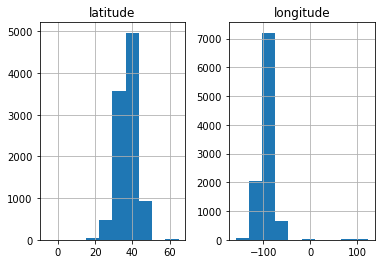

In [40]:
df.hist()

In [223]:
# Taking another look at the values/columns in our dataset. It is useful to glance at this periodically:

In [42]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [224]:
# Creating a new column that will contain latitudes rounded to the nearest whole number:

In [43]:
df['latitude_round'] = df['latitude'].round(0)

In [225]:
# The mode function returns modes in the dataset:

In [47]:
df.mode()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,latitude_round
0,3900 Las Vegas Blvd S,Cincinnati,US,us/ak/anchorage/1166nmuldoonrd/-1161002137,21.34877,-104.52325,McDonald's,57701,CA,"http://mcdonalds.com,http://www.mcdonalds.com/...",39.0
1,515 E Main St,NaN,NaN,us/ak/anchorage/1299nmuldoonrd/1725192761,26.12140,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,us/ak/anchorage/320w5thave/93075755,27.89380,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,us/ak/anchorage/800edimondblvd025/93075755,28.59996,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,us/ak/anchorage/800wnorthernlightsblvd/-116100...,29.74062,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,us/wy/sheridan/1514e5thst/-891525969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,us/wy/sheridan/1695coffeenave/-891525969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,us/wy/sheridan/727ebrundageln/-1947870258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,us/wy/wheatland/1457southst/-1009719089,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
# The following several lines find, manipulate, and examine the top 10 most common restaurants in the dataset:
# Manipulations were necessary in order to get the data into shape for visualization. This is why they were included.

In [48]:
n = 10
df['name'].value_counts()[:n].index.tolist()

["McDonald's",
 'Burger King',
 'Taco Bell',
 "Wendy's",
 "Arby's",
 'KFC',
 "Domino's Pizza",
 'Subway',
 'SONIC Drive In',
 "Hardee's"]

In [49]:
n = 10
hello = df['name'].value_counts()[:n]

In [50]:
hello

McDonald's        1886
Burger King       1154
Taco Bell          873
Wendy's            731
Arby's             518
KFC                421
Domino's Pizza     345
Subway             322
SONIC Drive In     226
Hardee's           192
Name: name, dtype: int64

In [51]:
df['name'].value_counts()

McDonald's                    1886
Burger King                   1154
Taco Bell                      873
Wendy's                        731
Arby's                         518
                              ... 
Taco Delight                     1
Subway - Roland Park             1
Kings Contrivance Jewelers       1
Elevation Burger                 1
City Bites                       1
Name: name, Length: 548, dtype: int64

In [52]:
df['name'].value_counts().head(10)

McDonald's        1886
Burger King       1154
Taco Bell          873
Wendy's            731
Arby's             518
KFC                421
Domino's Pizza     345
Subway             322
SONIC Drive In     226
Hardee's           192
Name: name, dtype: int64

In [53]:
df['name'] = df['name'].str.replace(r"[\"\',]", '')

In [54]:
df['name'].value_counts().head(10)

McDonalds         1997
Burger King       1154
Taco Bell          873
Wendys             734
Arbys              520
KFC                421
Dominos Pizza      359
Subway             322
SONIC Drive In     226
Hardees            194
Name: name, dtype: int64

In [55]:
aVariable = df['name'].value_counts().head(10)

In [56]:
print(aVariable.index)

Index(['McDonalds', 'Burger King', 'Taco Bell', 'Wendys', 'Arbys', 'KFC',
       'Dominos Pizza', 'Subway', 'SONIC Drive In', 'Hardees'],
      dtype='object')


In [57]:
aList = aVariable.index.tolist()

In [58]:
aList

['McDonalds',
 'Burger King',
 'Taco Bell',
 'Wendys',
 'Arbys',
 'KFC',
 'Dominos Pizza',
 'Subway',
 'SONIC Drive In',
 'Hardees']

In [59]:
df['common_name'] = df.loc[df['name'].isin(aList),'name']

In [60]:
df['common_name'].head()

0    McDonalds
1       Wendys
2          NaN
3    McDonalds
4          NaN
Name: common_name, dtype: object

In [61]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,latitude_round,common_name
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendys,43160,OH,http://www.wendys.com,40.0,Wendys
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frischs Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",39.0,NaN
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",39.0,NaN


In [228]:
# Below we see a visualization of latitudes for each top 10 restaurant type. The below visualization is useful because
# it points out outliers. It also shows the range of the data.

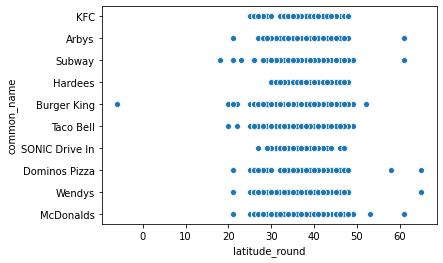

In [62]:
sns.scatterplot(x='latitude_round',y='common_name',data=df)

In [64]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,latitude_round,common_name
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendys,43160,OH,http://www.wendys.com,40.0,Wendys
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frischs Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",39.0,NaN
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",39.0,NaN


In [65]:
df2 = df.groupby(by='common_name')

In [66]:
df2.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,latitude_round,common_name
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.921300,-74.890210,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.532550,-83.445260,Wendys,43160,OH,http://www.wendys.com,40.0,Wendys
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.627360,-83.791410,Frischs Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",39.0,NaN
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.950080,-74.845530,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.351550,-82.097280,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",39.0,NaN
5,4182 Tonya Trl,Hamilton,US,us/oh/hamilton/4182tonyatrl/-1055723171,39.417600,-84.476410,Dominos Pizza,45011,OH,"https://www.dominos.com/en/?redirect=homepage,...",39.0,Dominos Pizza
6,590 S Main St,Englewood,US,us/oh/englewood/590smainst/-1055723171,39.869690,-84.293580,Dominos Pizza,45322,OH,https://www.dominos.com/en/?redirect=homepagea...,40.0,Dominos Pizza
7,401 N Jennings St,Saluda,US,us/sc/saluda/401njenningsst/-1161002137,34.005980,-81.770400,McDonalds,29138,SC,http://www.mcdonalds.com,34.0,McDonalds
8,205 W Church St,Batesburg,US,us/sc/batesburg/205wchurchst/-791445730,33.913350,-81.533300,Wendys,29006,SC,http://www.wendys.com,34.0,Wendys
9,2711 W. Kings Highway Ste. 18,Paragould,US,us/ar/paragould/2711wkingshighwayste18/-66712705,36.061070,-90.523250,Pizza Hut,72450,AR,http://www.pizzahut.com,36.0,NaN


In [230]:
# The table below shows descriptive statistics for latitude and longitude for the top 10 most numerous restaurants:
# It makes it easy to compare across different restaurants and see a variety of interesting numbers for each:

In [67]:
df2.describe()

latitude                                                        \
                  count       mean       std        min        25%        50%   
common_name                                                                     
Arbys             520.0  38.814047  4.433811  21.349177  35.893168  39.085349   
Burger King      1154.0  37.928883  5.660249  -6.244273  34.152764  39.440433   
Dominos Pizza     359.0  38.065772  5.507543  20.750812  34.306028  38.993480   
Hardees           194.0  38.345193  4.158909  29.794260  35.451490  37.649940   
KFC               421.0  37.588550  5.166958  24.718164  34.055300  38.862330   
McDonalds        1997.0  37.777748  4.923557  21.406261  34.188650  38.494000   
SONIC Drive In    226.0  35.924776  3.483266  26.618500  33.452652  35.948790   
Subway            322.0  37.702592  5.422889  17.989019  34.047105  38.833860   
Taco Bell         873.0  37.703732  4.609664  19.692339  34.260590  38.340390   
Wendys            734.0  37.841469  4.591523  21.408394  34.936922  38.808335   

                                     longitude             ...             \
                      75%        max     count       mean  ...        75%   
common_name                                                ...              
Arbys           41.454080  61.326200     520.0 -89.640341  ... -82.378711   
Burger King     41.858565  52.022988    1154.0 -88.621618  ... -80.151607   
Dominos Pizza   41.819935  64.840240     359.0 -94.293390  ... -80.610955   
Hardees         40.726051  48.412444     194.0 -86.235640  ... -81.109521   
KFC             41.121550  48.201900     421.0 -89.854010  ... -80.210290   
McDonalds       41.283913  61.203697    1997.0 -90.350753  ... -80.805452   
SONIC Drive In  38.583015  47.449050     226.0 -93.125197  ... -86.992657   
Subway          41.253194  61.138939     322.0 -95.210788  ... -81.175630   
Taco Bell       41.144402  48.508270     873.0 -92.583935  ... -83.219570   
Wendys          40.990095  64.836600     734.0 -88.483403  ... -80.516459   

                           latitude_round                                    \
                       max          count       mean       std   min    25%   
common_name                                                                   
Arbys           -69.800117          520.0  38.821154  4.424570  21.0  36.00   
Burger King     106.797101         1154.0  37.931542  5.660501  -6.0  34.00   
Dominos Pizza   -67.839270          359.0  38.086351  5.512891  21.0  34.00   
Hardees         -74.472700          194.0  38.345361  4.194655  30.0  35.25   
KFC             -70.153920          421.0  37.627078  5.189837  25.0  34.00   
McDonalds        13.251990         1997.0  37.776665  4.940649  21.0  34.00   
SONIC Drive In  -72.810140          226.0  35.915929  3.499462  27.0  33.00   
Subway          -67.452250          322.0  37.701863  5.465091  18.0  34.00   
Taco Bell       -68.408000          873.0  37.719359  4.618005  20.0  34.00   
Wendys          -68.808841          734.0  37.829700  4.598729  21.0  35.00   

                                  
                 50%   75%   max  
common_name                       
Arbys           39.0  41.0  61.0  
Burger King     39.0  42.0  52.0  
Dominos Pizza   39.0  42.0  65.0  
Hardees         38.0  41.0  48.0  
KFC             39.0  41.0  48.0  
McDonalds       38.0  41.0  61.0  
SONIC Drive In  36.0  39.0  47.0  
Subway          39.0  41.0  61.0  
Taco Bell       38.0  41.0  49.0  
Wendys          39.0  41.0  65.0  

[10 rows x 24 columns]

In [231]:
# Seeing provinces for Wendys:

In [68]:
df.loc[df['common_name']=='Wendys','province']

1       OH
8       SC
128     NC
217     NC
245     VA
        ..
9970    IA
9983    NC
9986    VA
9990    MD
9995    GA
Name: province, Length: 734, dtype: object

In [232]:
# The mode province for Wendys is Ohio.

In [69]:
df.loc[df['common_name']=='Wendys','province'].mode()

0    OH
dtype: object

In [70]:
the_dict = {}
for name in aList:
    place = df.loc[df['common_name']==name,'province'].mode()
    the_dict[name] = place

In [71]:
print(the_dict)

{'McDonalds': 0    TX
dtype: object, 'Burger King': 0    FL
dtype: object, 'Taco Bell': 0    CA
dtype: object, 'Wendys': 0    OH
dtype: object, 'Arbys': 0    OH
dtype: object, 'KFC': 0    FL
dtype: object, 'Dominos Pizza': 0    NM
dtype: object, 'Subway': 0    CA
dtype: object, 'SONIC Drive In': 0    MO
dtype: object, 'Hardees': 0    VA
dtype: object}


In [74]:
value_count_variable = df.loc[df['name']=='McDonalds','province'].value_counts()

In [266]:
# This shows the number of McDonalds in each province/state:
# We can see many of states with most McDonalds are known to be states with high population
# and many states with least McDonalds are known to be states with low population. There may be exceptions in this
# list too though

In [75]:
print(value_count_variable)

TX    153
CA    127
OH    110
FL     89
IN     83
IL     79
KY     76
NC     73
MO     73
VA     67
PA     67
NY     66
LA     58
GA     54
OK     50
MI     46
WI     45
SC     44
WA     42
TN     40
NJ     37
AL     37
IA     37
CT     36
MD     33
AZ     32
MN     29
UT     27
AR     26
MA     25
OR     24
CO     21
NM     21
WV     19
SD     18
VT     17
NV     16
ID     14
NE     12
ME     12
KS     11
MS     10
NH      9
ND      7
DE      6
WY      5
DC      4
MT      3
RI      3
AK      3
HI      1
Name: province, dtype: int64


In [76]:
print(value_count_variable.dtypes)

int64


In [233]:
# This histogram shows that in many states there are very few McDonalds, but in a few there are many. The y-axis
# shows how many states and the x-axis shows the number of McDonalds in those states.

(array([15., 10., 11.,  3.,  6.,  3.,  0.,  1.,  1.,  1.]),
 array([  1. ,  16.2,  31.4,  46.6,  61.8,  77. ,  92.2, 107.4, 122.6,
        137.8, 153. ]),
 <a list of 10 Patch objects>)

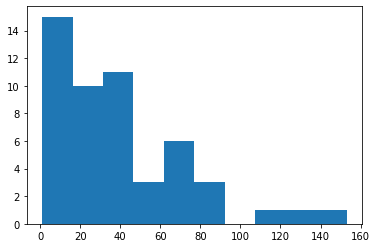

In [77]:
plt.hist(value_count_variable)

In [234]:
# The line below shows the maximum latitude for each of the top 10 most numerous restaurants:

In [79]:
df.groupby('common_name')['latitude_round'].max()

common_name
Arbys             61.0
Burger King       52.0
Dominos Pizza     65.0
Hardees           48.0
KFC               48.0
McDonalds         61.0
SONIC Drive In    47.0
Subway            61.0
Taco Bell         49.0
Wendys            65.0
Name: latitude_round, dtype: float64

In [82]:
variable5 = df.groupby('common_name')['latitude_round'].max()

In [83]:
print(variable5)

common_name
Arbys             61.0
Burger King       52.0
Dominos Pizza     65.0
Hardees           48.0
KFC               48.0
McDonalds         61.0
SONIC Drive In    47.0
Subway            61.0
Taco Bell         49.0
Wendys            65.0
Name: latitude_round, dtype: float64


In [84]:
print(variable5.dtypes)

float64


In [85]:
fast_names = ['Arbys','Burger King','Dominos Pizza','Hardees','KFC','McDonalds','SONIC Drive In','Subway','Taco Bell','Wendys']

In [86]:
fast_lats = [61.0,52.0,65.0,48.0,48.0,61.0,47.0,61.0,49.0,65.0]

In [87]:
zip_iterator = zip(fast_names, fast_lats)

In [88]:
fast_dict = dict(zip_iterator)

In [89]:
print(fast_dict)

{'Arbys': 61.0, 'Burger King': 52.0, 'Dominos Pizza': 65.0, 'Hardees': 48.0, 'KFC': 48.0, 'McDonalds': 61.0, 'SONIC Drive In': 47.0, 'Subway': 61.0, 'Taco Bell': 49.0, 'Wendys': 65.0}


In [95]:
df3 = pd.DataFrame(fast_dict.items())

In [97]:
df3

,0,1
0,Arbys,61.0
1,Burger King,52.0
2,Dominos Pizza,65.0
3,Hardees,48.0
4,KFC,48.0
5,McDonalds,61.0
6,SONIC Drive In,47.0
7,Subway,61.0
8,Taco Bell,49.0
9,Wendys,65.0


In [98]:
df3.columns = ['Fast Food Restaurants','Max Latitude']

In [99]:
df3

,Fast Food Restaurants,Max Latitude
0,Arbys,61.0
1,Burger King,52.0
2,Dominos Pizza,65.0
3,Hardees,48.0
4,KFC,48.0
5,McDonalds,61.0
6,SONIC Drive In,47.0
7,Subway,61.0
8,Taco Bell,49.0
9,Wendys,65.0


In [102]:
df3.sort_values('Max Latitude')

,Fast Food Restaurants,Max Latitude
6,SONIC Drive In,47.0
3,Hardees,48.0
4,KFC,48.0
8,Taco Bell,49.0
1,Burger King,52.0
0,Arbys,61.0
5,McDonalds,61.0
7,Subway,61.0
2,Dominos Pizza,65.0
9,Wendys,65.0


In [236]:
# The bar plot below shows the maximum latitude of each of the top 10 most numerous restaurants, in order of lowest
# to highest max latitude:

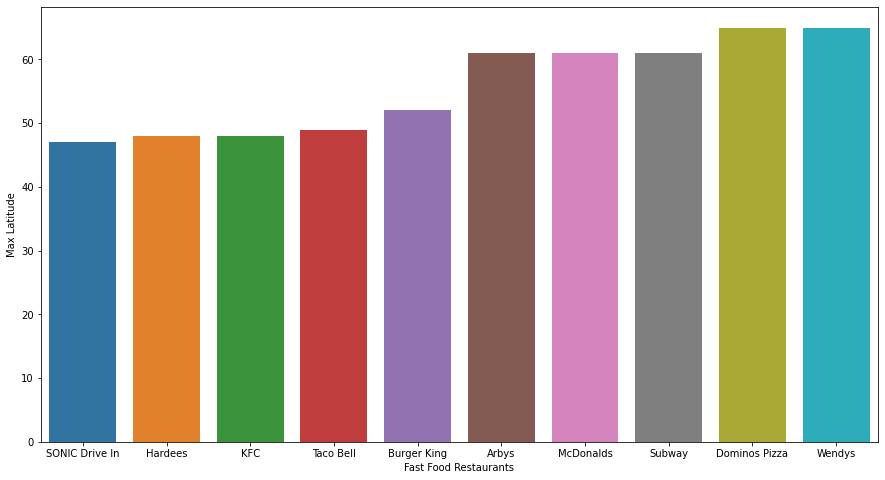

In [104]:
plt.figure(figsize=(15,8))
sns.barplot(x='Fast Food Restaurants',y='Max Latitude',data=df3.sort_values('Max Latitude'))

In [235]:
# The plot below shows different quantitative variables in the dataset plotted against each other. It can be seen
# that longitudes tend to fall into 3 clusters, with some outliers, showing that there are perhaps some wide open
# spaces, maybe in middle America, where not many restaurants fall:

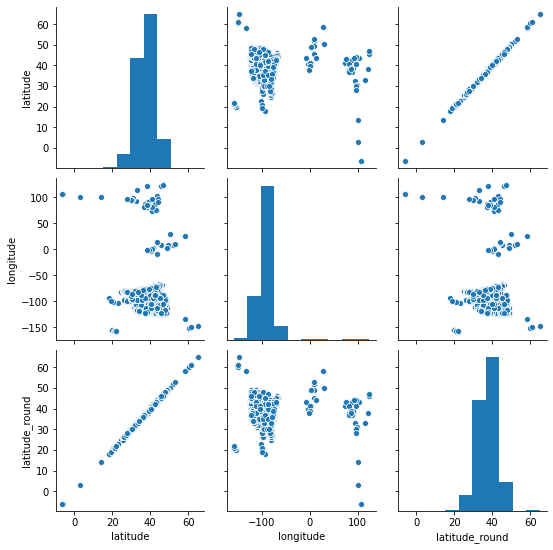

In [81]:
sns.pairplot(df)

In [105]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,latitude_round,common_name
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendys,43160,OH,http://www.wendys.com,40.0,Wendys
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frischs Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",39.0,NaN
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",39.0,NaN


In [106]:
df['common_name'].value_counts()

McDonalds         1997
Burger King       1154
Taco Bell          873
Wendys             734
Arbys              520
KFC                421
Dominos Pizza      359
Subway             322
SONIC Drive In     226
Hardees            194
Name: common_name, dtype: int64

In [107]:
df['name'].value_counts()

McDonalds                          1997
Burger King                        1154
Taco Bell                           873
Wendys                              734
Arbys                               520
                                   ... 
Little Caesars Pizza Smithfield       1
Convergence Zone                      1
Moes Original Bar B Que               1
Hunam Garden                          1
A&W/Long John Silvers                 1
Name: name, Length: 520, dtype: int64

In [108]:
variable18 = df['common_name'].value_counts()

In [109]:
theSeries = pd.Series(variable18)

In [110]:
print(theSeries)

McDonalds         1997
Burger King       1154
Taco Bell          873
Wendys             734
Arbys              520
KFC                421
Dominos Pizza      359
Subway             322
SONIC Drive In     226
Hardees            194
Name: common_name, dtype: int64


In [113]:
theSeries.index

Index(['McDonalds', 'Burger King', 'Taco Bell', 'Wendys', 'Arbys', 'KFC',
       'Dominos Pizza', 'Subway', 'SONIC Drive In', 'Hardees'],
      dtype='object')

In [248]:
# The pie chart shows the amount of the top 10 most numerous restaurants in comparison to one another:
# It can be seen that McDonalds has the most restaurants, since its slice of the pie is the biggest
# It can easily be seen that McDonalds appears to have as many restaurants as the bottom 5 or 6 restaurants in the 
# top 10 do combined

([<matplotlib.patches.Wedge at 0x12386ddc0>,
 [Text(-1.3153489836751593, 0.9961711957011836, 'McDonalds'),
  Text(-1.1405682148613676, -1.1923104240288909, 'Burger King'),
  Text(0.28443389643746486, -1.6252991597110367, 'Taco Bell'),
  Text(1.308413992860796, -1.0052625643512587, 'Wendys'),
  Text(1.6452661323329232, -0.12489737306390686, 'Arbys'),
  Text(1.5448258075090708, 0.5796664769106004, 'KFC'),
  Text(1.2412056205303772, 1.0871562020076977, 'Dominos Pizza'),
  Text(0.8438519843247769, 1.4178906264416649, 'Subway'),
  Text(0.46179923223956626, 1.5840585434582106, 'SONIC Drive In'),
  Text(0.14768799039840672, 1.6433770892561697, 'Hardees')],
 [Text(-0.7174630820046323, 0.5433661067461001, '29.4%'),
  Text(-0.6221281171971095, -0.6503511403793949, '17.0%'),
  Text(0.15514576169316263, -0.8865268143878381, '12.8%'),
  Text(0.7136803597422523, -0.5483250351006864, '10.8%'),
  Text(0.8974178903634125, -0.06812583985304009, '7.6%'),
  Text(0.8426322586413113, 0.3161817146785092, '6.

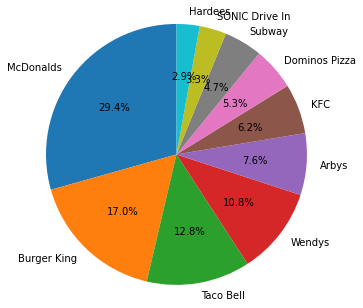

In [247]:
fig1, ax1 = plt.subplots()
ax1.pie(theSeries, labels=theSeries.index, autopct='%1.1f%%', startangle=90, radius=1.5)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. 
# add a pie chart title

In [135]:
variable25 = df.groupby('common_name')['latitude_round'].mean()

In [136]:
variable25

common_name
Arbys             38.821154
Burger King       37.931542
Dominos Pizza     38.086351
Hardees           38.345361
KFC               37.627078
McDonalds         37.776665
SONIC Drive In    35.915929
Subway            37.701863
Taco Bell         37.719359
Wendys            37.829700
Name: latitude_round, dtype: float64

In [137]:
variable26 = pd.DataFrame(variable25)

In [138]:
variable26

,latitude_round
common_name,
Arbys,38.821154
Burger King,37.931542
Dominos Pizza,38.086351
Hardees,38.345361
KFC,37.627078
McDonalds,37.776665
SONIC Drive In,35.915929
Subway,37.701863
Taco Bell,37.719359


In [139]:
variable26.index

Index(['Arbys', 'Burger King', 'Dominos Pizza', 'Hardees', 'KFC', 'McDonalds',
       'SONIC Drive In', 'Subway', 'Taco Bell', 'Wendys'],
      dtype='object', name='common_name')

In [140]:
variable26.columns

Index(['latitude_round'], dtype='object')

In [141]:
variable26.columns = ['Mean Latitude']

In [251]:
# This bar plot shows the mean latitude, in order, for each of the top 10 most numerous restaurants:
# The similarity of mean values across restaurants seems to suggest that none are much more or less concentrated
# in the south or north than one another. This is interesting because it indicates that there is not much of
# a different culture for fast food restaurants between the north and south.

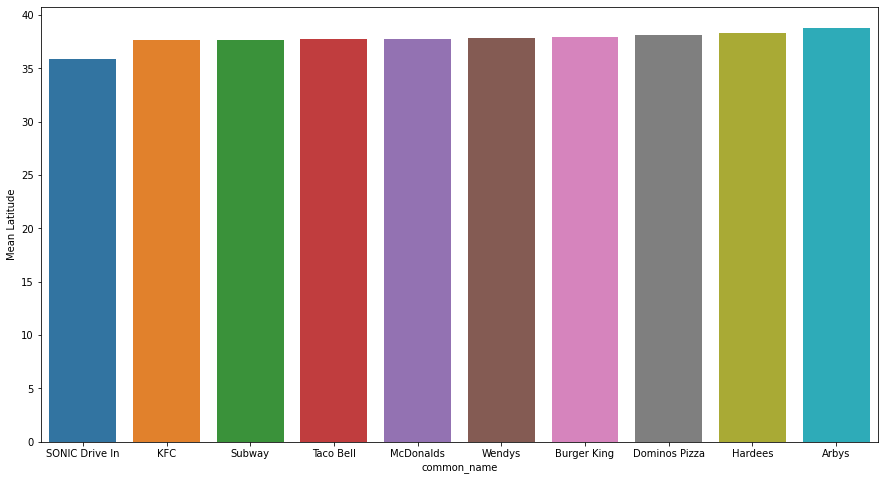

In [171]:
plt.figure(figsize=(15,8))
sns.barplot(x=variable26.sort_values('Mean Latitude').index,y='Mean Latitude',data=variable26.sort_values('Mean Latitude'))

In [148]:
variable35 = df.groupby('common_name')['latitude_round'].min()

In [149]:
variable35

common_name
Arbys             21.0
Burger King       -6.0
Dominos Pizza     21.0
Hardees           30.0
KFC               25.0
McDonalds         21.0
SONIC Drive In    27.0
Subway            18.0
Taco Bell         20.0
Wendys            21.0
Name: latitude_round, dtype: float64

In [150]:
variable36 = pd.DataFrame(variable35)

In [151]:
variable36.columns = ['Min Latitude']

In [250]:
# This bar plot shows the min latitude, in order, for each of the top 10 most numerous restaurants:

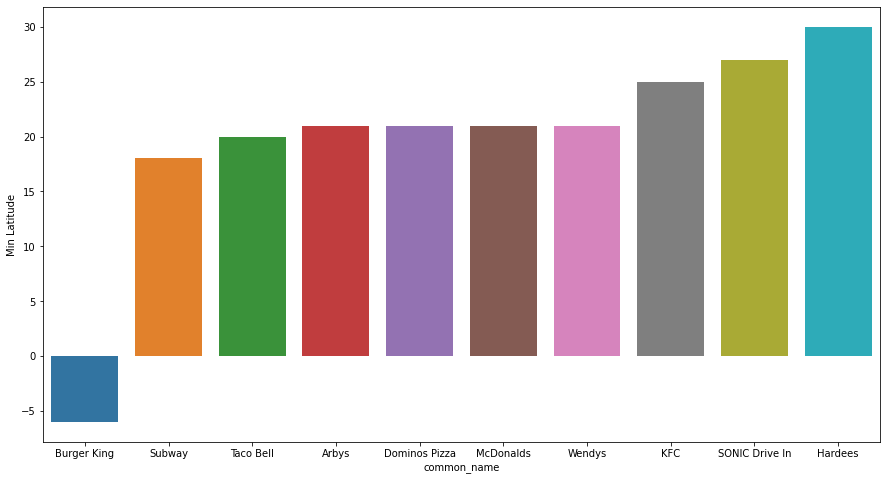

In [170]:
plt.figure(figsize=(15,8))
sns.barplot(x=variable36.sort_values('Min Latitude').index,y='Min Latitude',data=variable36.sort_values('Min Latitude'))

In [153]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,latitude_round,common_name
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendys,43160,OH,http://www.wendys.com,40.0,Wendys
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frischs Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",39.0,NaN
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",39.0,NaN


In [155]:
mc_province = df.loc[df['name']=='McDonalds','province']

In [156]:
mc_province

0       NY
3       NY
7       SC
12      OK
15      KY
        ..
9967    OR
9969    VA
9979    SC
9985    CO
9989    MT
Name: province, Length: 1997, dtype: object

In [158]:
mc_values = mc_province.value_counts()

In [159]:
mc_values

TX    153
CA    127
OH    110
FL     89
IN     83
IL     79
KY     76
NC     73
MO     73
VA     67
PA     67
NY     66
LA     58
GA     54
OK     50
MI     46
WI     45
SC     44
WA     42
TN     40
NJ     37
AL     37
IA     37
CT     36
MD     33
AZ     32
MN     29
UT     27
AR     26
MA     25
OR     24
CO     21
NM     21
WV     19
SD     18
VT     17
NV     16
ID     14
NE     12
ME     12
KS     11
MS     10
NH      9
ND      7
DE      6
WY      5
DC      4
MT      3
RI      3
AK      3
HI      1
Name: province, dtype: int64

In [160]:
mc10 = pd.DataFrame(mc_values.head(10))

In [161]:
mc10

,province
TX,153
CA,127
OH,110
FL,89
IN,83
IL,79
KY,76
NC,73
MO,73
VA,67


In [165]:
mc10.columns

Index(['province'], dtype='object')

In [166]:
mc10.columns = ['Num of Restaurants in Province']

In [167]:
mc10.index

Index(['TX', 'CA', 'OH', 'FL', 'IN', 'IL', 'KY', 'NC', 'MO', 'VA'], dtype='object')

In [253]:
# The bar plot below shows the top 10 states with the most McDonalds, in order:
# We can see states known to have a high population, such as Texas and California, are at the top:
# Sensibly, McDonalds may find that it has the most demand for many restaurants in the places with most people.

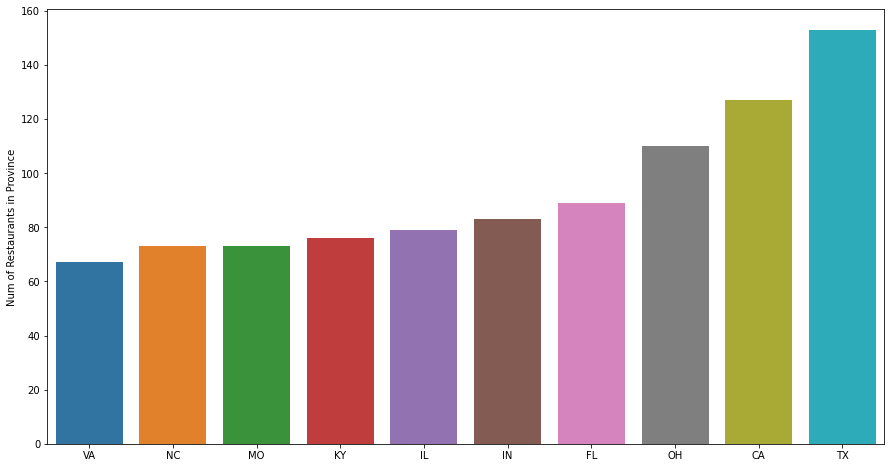

In [169]:
plt.figure(figsize=(15,8))
sns.barplot(x=mc10.sort_values('Num of Restaurants in Province').index,y='Num of Restaurants in Province',data=mc10.sort_values('Num of Restaurants in Province'))

In [260]:
# In the pie chart below, like the bar plot above, we can see the relative number of McDonalds across 
# each of the top 10 states it has the most restaurants in. The state of New York, despite having a large population, 
# is notably absent from this top 10, for reasons that are not obviously apparent.

([<matplotlib.patches.Wedge at 0x123afa1f0>,
 [Text(-0.8153271831619552, 1.4344830373333775, 'TX'),
  Text(-1.6403691557097873, 0.17801413706770564, 'CA'),
  Text(-1.2699244738714777, -1.0534665778572434, 'OH'),
  Text(-0.3376002596527833, -1.6150932061903962, 'FL'),
  Text(0.6042948991025655, -1.5353591354854474, 'IN'),
  Text(1.314948080114598, -0.996700329388394, 'IL'),
  Text(1.6371286051261442, -0.20569377792662147, 'KY'),
  Text(1.5333090530269657, 0.6094779306140214, 'NC'),
  Text(1.0620221266374068, 1.262778287163887, 'MO'),
  Text(0.3702640163098199, 1.6079193257828956, 'VA')],
 [Text(-0.4447239180883391, 0.782445293090933, '16.5%'),
  Text(-0.8947468122053384, 0.09709862021874852, '13.7%'),
  Text(-0.6926860766571695, -0.5746181333766781, '11.8%'),
  Text(-0.1841455961742454, -0.8809599306493069, '9.6%'),
  Text(0.32961539951049024, -0.8374686193556985, '8.9%'),
  Text(0.7172444073352351, -0.543654725120942, '8.5%'),
  Text(0.8929792391597148, -0.1121966061417935, '8.2%'),
  

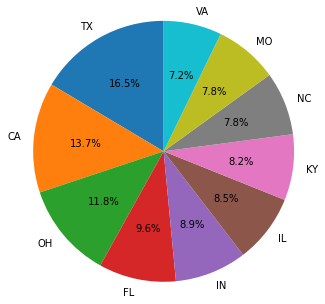

In [255]:
fig1, ax1 = plt.subplots()
ax1.pie(mc10['Num of Restaurants in Province'], labels=mc10.index, autopct='%1.1f%%', startangle=90, radius=1.5)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. 
# add a pie chart title

In [174]:
df.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites,latitude_round,common_name
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendys,43160,OH,http://www.wendys.com,40.0,Wendys
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frischs Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com...",39.0,NaN
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonalds,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/...",45.0,McDonalds
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse...",39.0,NaN


In [177]:
df['common_name'].value_counts(dropna=False)

NaN               3200
McDonalds         1997
Burger King       1154
Taco Bell          873
Wendys             734
Arbys              520
KFC                421
Dominos Pizza      359
Subway             322
SONIC Drive In     226
Hardees            194
Name: common_name, dtype: int64

In [178]:
df['common_name'].head(100)

0     McDonalds
1        Wendys
2           NaN
3     McDonalds
4           NaN
        ...    
95          NaN
96          NaN
97          NaN
98    McDonalds
99          NaN
Name: common_name, Length: 100, dtype: object

In [180]:
restaurant_value_counts = df['common_name'].value_counts(dropna=False)

In [181]:
restaurant_value_counts

NaN               3200
McDonalds         1997
Burger King       1154
Taco Bell          873
Wendys             734
Arbys              520
KFC                421
Dominos Pizza      359
Subway             322
SONIC Drive In     226
Hardees            194
Name: common_name, dtype: int64

In [182]:
rest_vc = pd.DataFrame(restaurant_value_counts)

In [183]:
rest_vc

,common_name
NaN,3200
McDonalds,1997
Burger King,1154
Taco Bell,873
Wendys,734
Arbys,520
KFC,421
Dominos Pizza,359
Subway,322
SONIC Drive In,226


In [184]:
rest_vc.index

Index([             nan,      'McDonalds',    'Burger King',      'Taco Bell',
               'Wendys',          'Arbys',            'KFC',  'Dominos Pizza',
               'Subway', 'SONIC Drive In',        'Hardees'],
      dtype='object')

In [185]:
rest_vc.columns

Index(['common_name'], dtype='object')

In [186]:
rest_vc.columns = ['Frequency']

In [264]:
# This pie chart below is interesting because it compares number of restaurants, for different restaurants in the
# dataset. However, interestingly, unlike before, restaurants outside of the top 10 most numerous are included.
# And yet, these restaurants, even though there are hundreds of them as we saw earlier,
# are, for the purposes of visualization, all grouped together in a category known as 'nan'.
# We can see that nan accounts for 32% of all the restaurants and McDonalds is second at 20%. 
# It is incredible to note that McDonalds has almost as many restaurants as hundreds of other fast food restaurant
# names combined. This plot almost hints that perhaps there is a pareto distribution of restaurants.
# In a pareto distribution, a top fraction of restaurants have a disproportionately large number, while a large
# number of smaller restaurants have way fewer numbers. Whether this data fits some kind of pareto distribution
# could be investigated in further research. Other market-sensitive phenomena, such as land ownership in Italy,
# for instance, have been shown to follow a pareto distribution.

([<matplotlib.patches.Wedge at 0x123c01130>,
 [Text(-1.3931410572119054, 0.8841142430198122, 'nan'),
  Text(-0.7962560178213348, -1.4451561694444344, 'McDonalds'),
  Text(0.7711677404169269, -1.4586981579957699, 'Burger King'),
  Text(1.4874009138115454, -0.7142398207833139, 'Taco Bell'),
  Text(1.6473036419378602, 0.09429056823597096, 'Wendys'),
  Text(1.4849238606135382, 0.719375512636193, 'Arbys'),
  Text(1.2109282092784925, 1.1207822589484473, 'KFC'),
  Text(0.902852741368689, 1.3810709349642558, 'Dominos Pizza'),
  Text(0.5890481627486053, 1.5412729355836017, 'Subway'),
  Text(0.3163047203092046, 1.619398445074626, 'SONIC Drive In'),
  Text(0.10050015773695468, 1.6469364645592275, 'Hardees')],
 [Text(-0.7598951221155846, 0.48224413255626114, '32.0%'),
  Text(-0.43432146426618257, -0.7882670015151458, '20.0%'),
  Text(0.4206369493183237, -0.7956535407249652, '11.5%'),
  Text(0.8113095893517518, -0.38958535679089845, '8.7%'),
  Text(0.8985292592388326, 0.05143121903780233, '7.3%'),


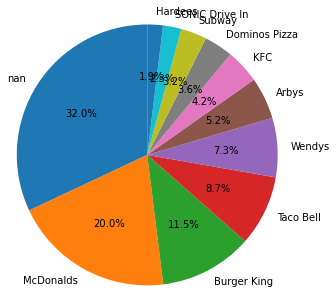

In [261]:
fig1, ax1 = plt.subplots()
ax1.pie(rest_vc['Frequency'], labels=rest_vc.index, autopct='%1.1f%%', startangle=90, radius=1.5)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. 
# add a pie chart title